In [2]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

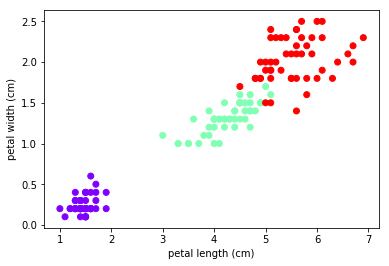

In [6]:
# grafica de clases por datos de petalos
X = iris_dataset.data[:, 2:]  # we only take the first two features.
Y = iris_dataset.target
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow, marker='o')
plt.xlabel(iris_dataset.feature_names[2])
plt.ylabel(iris_dataset.feature_names[3])

plt.show()

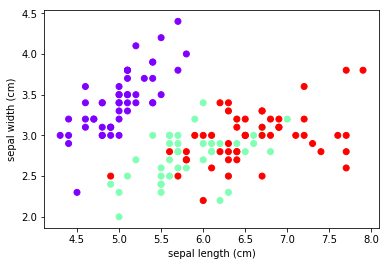

In [7]:
# grafica de clases por datos de sépalos
X = iris_dataset.data[:, :2] 
Y = iris_dataset.target
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow, marker='o')
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])

plt.show()

In [8]:
feat_names = ['sepal_length','sepal_width','petal_length','petal_width']
d = pd.DataFrame(iris_dataset.data,
                 columns=feat_names)
t = pd.DataFrame(iris_dataset.target,
                 columns=['target'])
iris = pd.concat([d, t], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
map_dict = dict ([(a,z) for a,z in zip([0,1,2],iris_dataset['target_names'])])
iris['target_name'] = iris['target'].map(map_dict)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


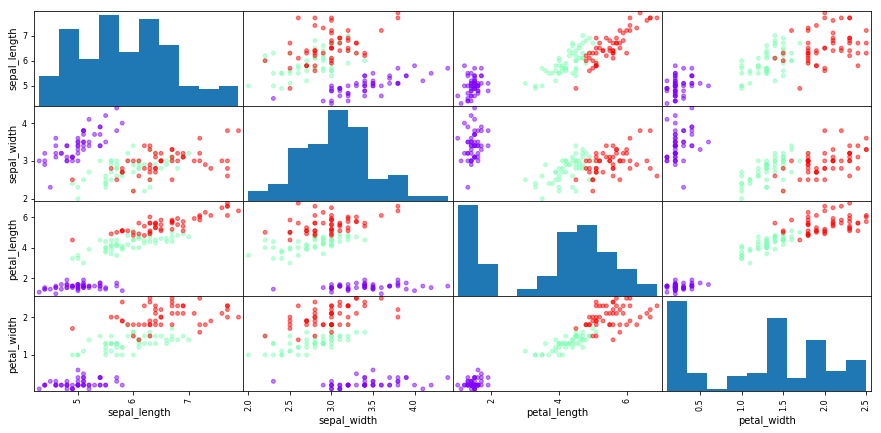

In [11]:
from pandas.tools.plotting import scatter_matrix
colors=['red','green','blue']


_ = scatter_matrix(iris[feat_names], figsize=(15, 7), 
               diagonal='hist' , s=60,  c=iris.target , cmap=plt.cm.rainbow)

¿Somos capaces de encontrar un atributo cuyo valor nos permita separar una clase de todas las demás?

target_name
setosa        Axes(0.125,0.125;0.775x0.755)
versicolor    Axes(0.125,0.125;0.775x0.755)
virginica     Axes(0.125,0.125;0.775x0.755)
Name: petal_length, dtype: object

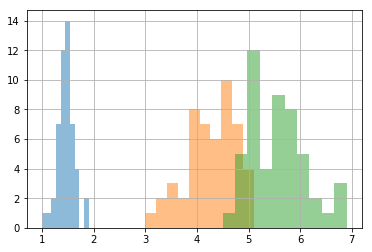

In [12]:
iris.groupby('target_name').petal_length.hist(alpha=0.5)

In [13]:
def search_thresh (data, spec):
    no_target = data[data['target_name'] != spec ]
    target = data['target_name']==spec

    best_acc = 0.0
    for fi in feat_names:  # Por cada parámetro o característica de la que tenemos valores
        thresh = data[fi].copy()           # obtenemos una lista de valores para el umbral

        thresh.sort_values(inplace=True)
        thresh=thresh.unique()          # que ordenamos de menor a mayor.
       
        for t in thresh:                   # Por cada posible valor de umbral
            
            pred = (data[fi] < t)       # determinamos los elementos de la tabla que están por encima

            acc = (pred.values==target.values).mean() # y calculamos que porcentaje de la familia virginica está recogida.
            
            if acc > best_acc:          # Si mejoramos la detección, actualizamos los parámetro de la colección.

                best_acc = acc             # Mejor precisión obtenida.
                best_fi = fi               # Mejor característica para clasificar las familias.
                best_t = t                 # Valor óptimo de umbral.
    
    print ('class: %s --- best acc: %f  feature: %s  threshold %f' % (spec, best_acc, best_fi, best_t))


In [14]:

search_thresh (iris, 'virginica')
search_thresh (iris, 'setosa')
search_thresh (iris, 'versicolor')

class: virginica --- best acc: 0.666667  feature: sepal_length  threshold 4.300000
class: setosa --- best acc: 1.000000  feature: petal_length  threshold 3.000000
class: versicolor --- best acc: 0.740000  feature: sepal_width  threshold 3.000000


Parece que el ancho del pétalo permite separar Setosa del resto (petal_length < 3 => setosa)

¿Somos capaces de clasificar el resto?

In [15]:
no_setosa = iris[iris['target_name']!='setosa']
no_setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


In [16]:
search_thresh (no_setosa, 'versicolor')
search_thresh (no_setosa, 'virginica')

class: versicolor --- best acc: 0.940000  feature: petal_width  threshold 1.700000
class: virginica --- best acc: 0.500000  feature: sepal_length  threshold 4.900000


target_name
versicolor    Axes(0.125,0.125;0.775x0.755)
virginica     Axes(0.125,0.125;0.775x0.755)
Name: petal_width, dtype: object

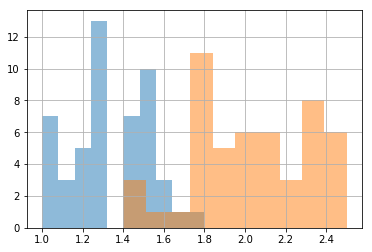

In [17]:
no_setosa.groupby('target_name').petal_width.hist(alpha=0.5)

Podríamos intentar clasificar cada uno de los dos subgrupos resultantes

              sepal_length  sepal_width  petal_length  petal_width    target
sepal_length      1.000000     0.508855      0.739304     0.591594  0.244279
sepal_width       0.508855     1.000000      0.396523     0.580091 -0.091582
petal_length      0.739304     0.396523      1.000000     0.759842  0.562562
petal_width       0.591594     0.580091      0.759842     1.000000  0.283110
target            0.244279    -0.091582      0.562562     0.283110  1.000000


target_name
versicolor    Axes(0.125,0.125;0.775x0.755)
virginica     Axes(0.125,0.125;0.775x0.755)
Name: sepal_width, dtype: object

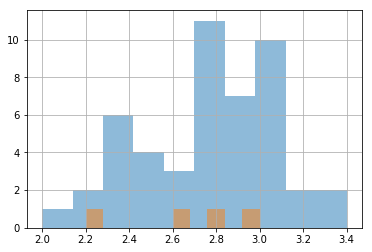

In [18]:
versicolor_menor = no_setosa[no_setosa['petal_width']<1.7]
print(versicolor_menor.corr())
versicolor_menor.groupby('target_name').sepal_width.hist(alpha=0.5)

              sepal_length  sepal_width  petal_length  petal_width    target
sepal_length      1.000000     0.350889      0.865129     0.226632  0.181671
sepal_width       0.350889     1.000000      0.305950     0.418871 -0.091560
petal_length      0.865129     0.305950      1.000000     0.308638  0.210719
petal_width       0.226632     0.418871      0.308638     1.000000  0.178441
target            0.181671    -0.091560      0.210719     0.178441  1.000000


target_name
versicolor    Axes(0.125,0.125;0.775x0.755)
virginica     Axes(0.125,0.125;0.775x0.755)
Name: petal_length, dtype: object

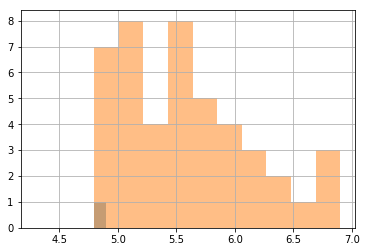

In [19]:
versicolor_mayor = no_setosa[no_setosa['petal_width']>1.7]
print(versicolor_mayor.corr())
versicolor_mayor.groupby('target_name').petal_length.hist(alpha=0.5)

### Arboles de decisión

Los [Arboles de Decision](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) son diagramas con construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.
Los [Arboles de Decision](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) están compuestos por nodos interiores, nodos terminales y ramas que emanan de los nodos interiores. Cada nodo interior en el árbol contiene una prueba de un atributo, y cada rama representa un valor distinto del atributo. Siguiendo las ramas desde el nodo raíz hacia abajo, cada ruta finalmente termina en un nodo terminal creando una segmentación de los datos.

In [34]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
X, Y = iris[feat_names], iris.target_name
clf = clf.fit(X, Y)

Interpretación intuitiva

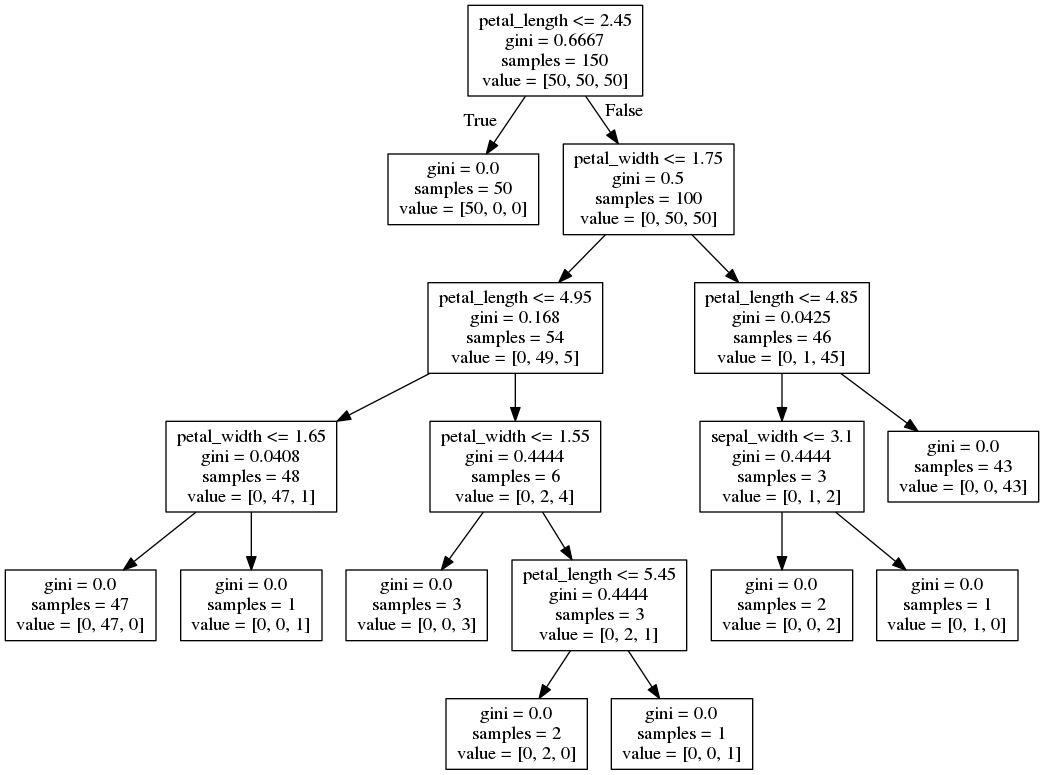

In [35]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=feat_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree.png') 
from IPython.core.display import Image 
Image(filename='iris-tree.png')

In [24]:
clf.predict ([[2, 1, 1, 4.6]])

array(['versicolor'], dtype=object)

In [25]:
clf.predict ([[6.2, 3.4, 5.4, 2.3]])

array(['virginica'], dtype=object)

El modelo es configurable. Por ejemplo, se puede limitar el nivel de profundida...

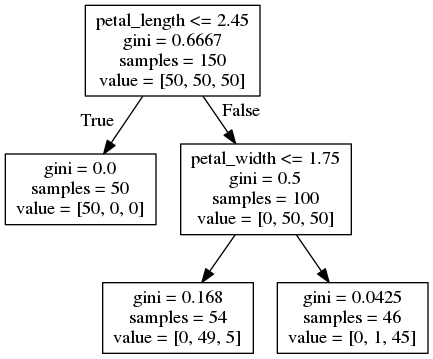

In [27]:
clf = tree.DecisionTreeClassifier(max_depth=2)

clf = clf.fit(X, Y)
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=feat_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree2.png') 
from IPython.core.display import Image 
Image(filename='iris-tree2.png')

## Overfitting

Para poder mostrar gráficamente el concepto, vamos a usar sólo dos de los atributos, precisamente los menos optimos para clasificar.

In [28]:
XX = X[['sepal_length','sepal_width']]
YY = iris.target

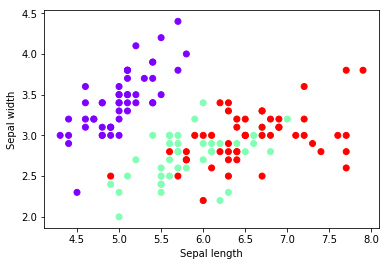

In [29]:
plt.scatter(XX['sepal_length'], XX['sepal_width'], c=YY, cmap=plt.cm.rainbow, marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

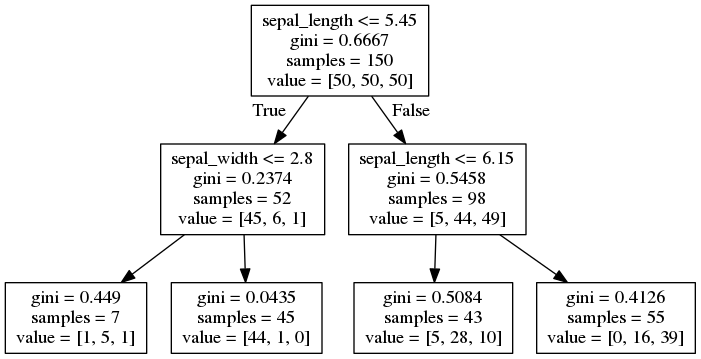

In [36]:
clf = tree.DecisionTreeClassifier(max_depth=2)

clf = clf.fit(XX, YY)
#plots.show_tree(clf, ['sepal_length','sepal_width'], class_names= iris['target_name'].unique())

from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=['sepal_length','sepal_width']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree3.png') 
from IPython.core.display import Image 
Image(filename='iris-tree3.png')


Calidad de la calsificación vs. profundiad del árbol

In [3]:
accs = []
for n in range(1, 20):
    clf = tree.DecisionTreeClassifier(max_depth=n)
    clf = clf.fit(XX, YY)
    acc = sum(clf.predict (XX) == YY) / len(YY) * 100
    accs.append(acc) 

plt.plot(range(1, 20), accs)
plt.axis([0, 20, 0, 100])
plt.xlabel("Profundidad")
plt.show()


NameError: name 'tree' is not defined

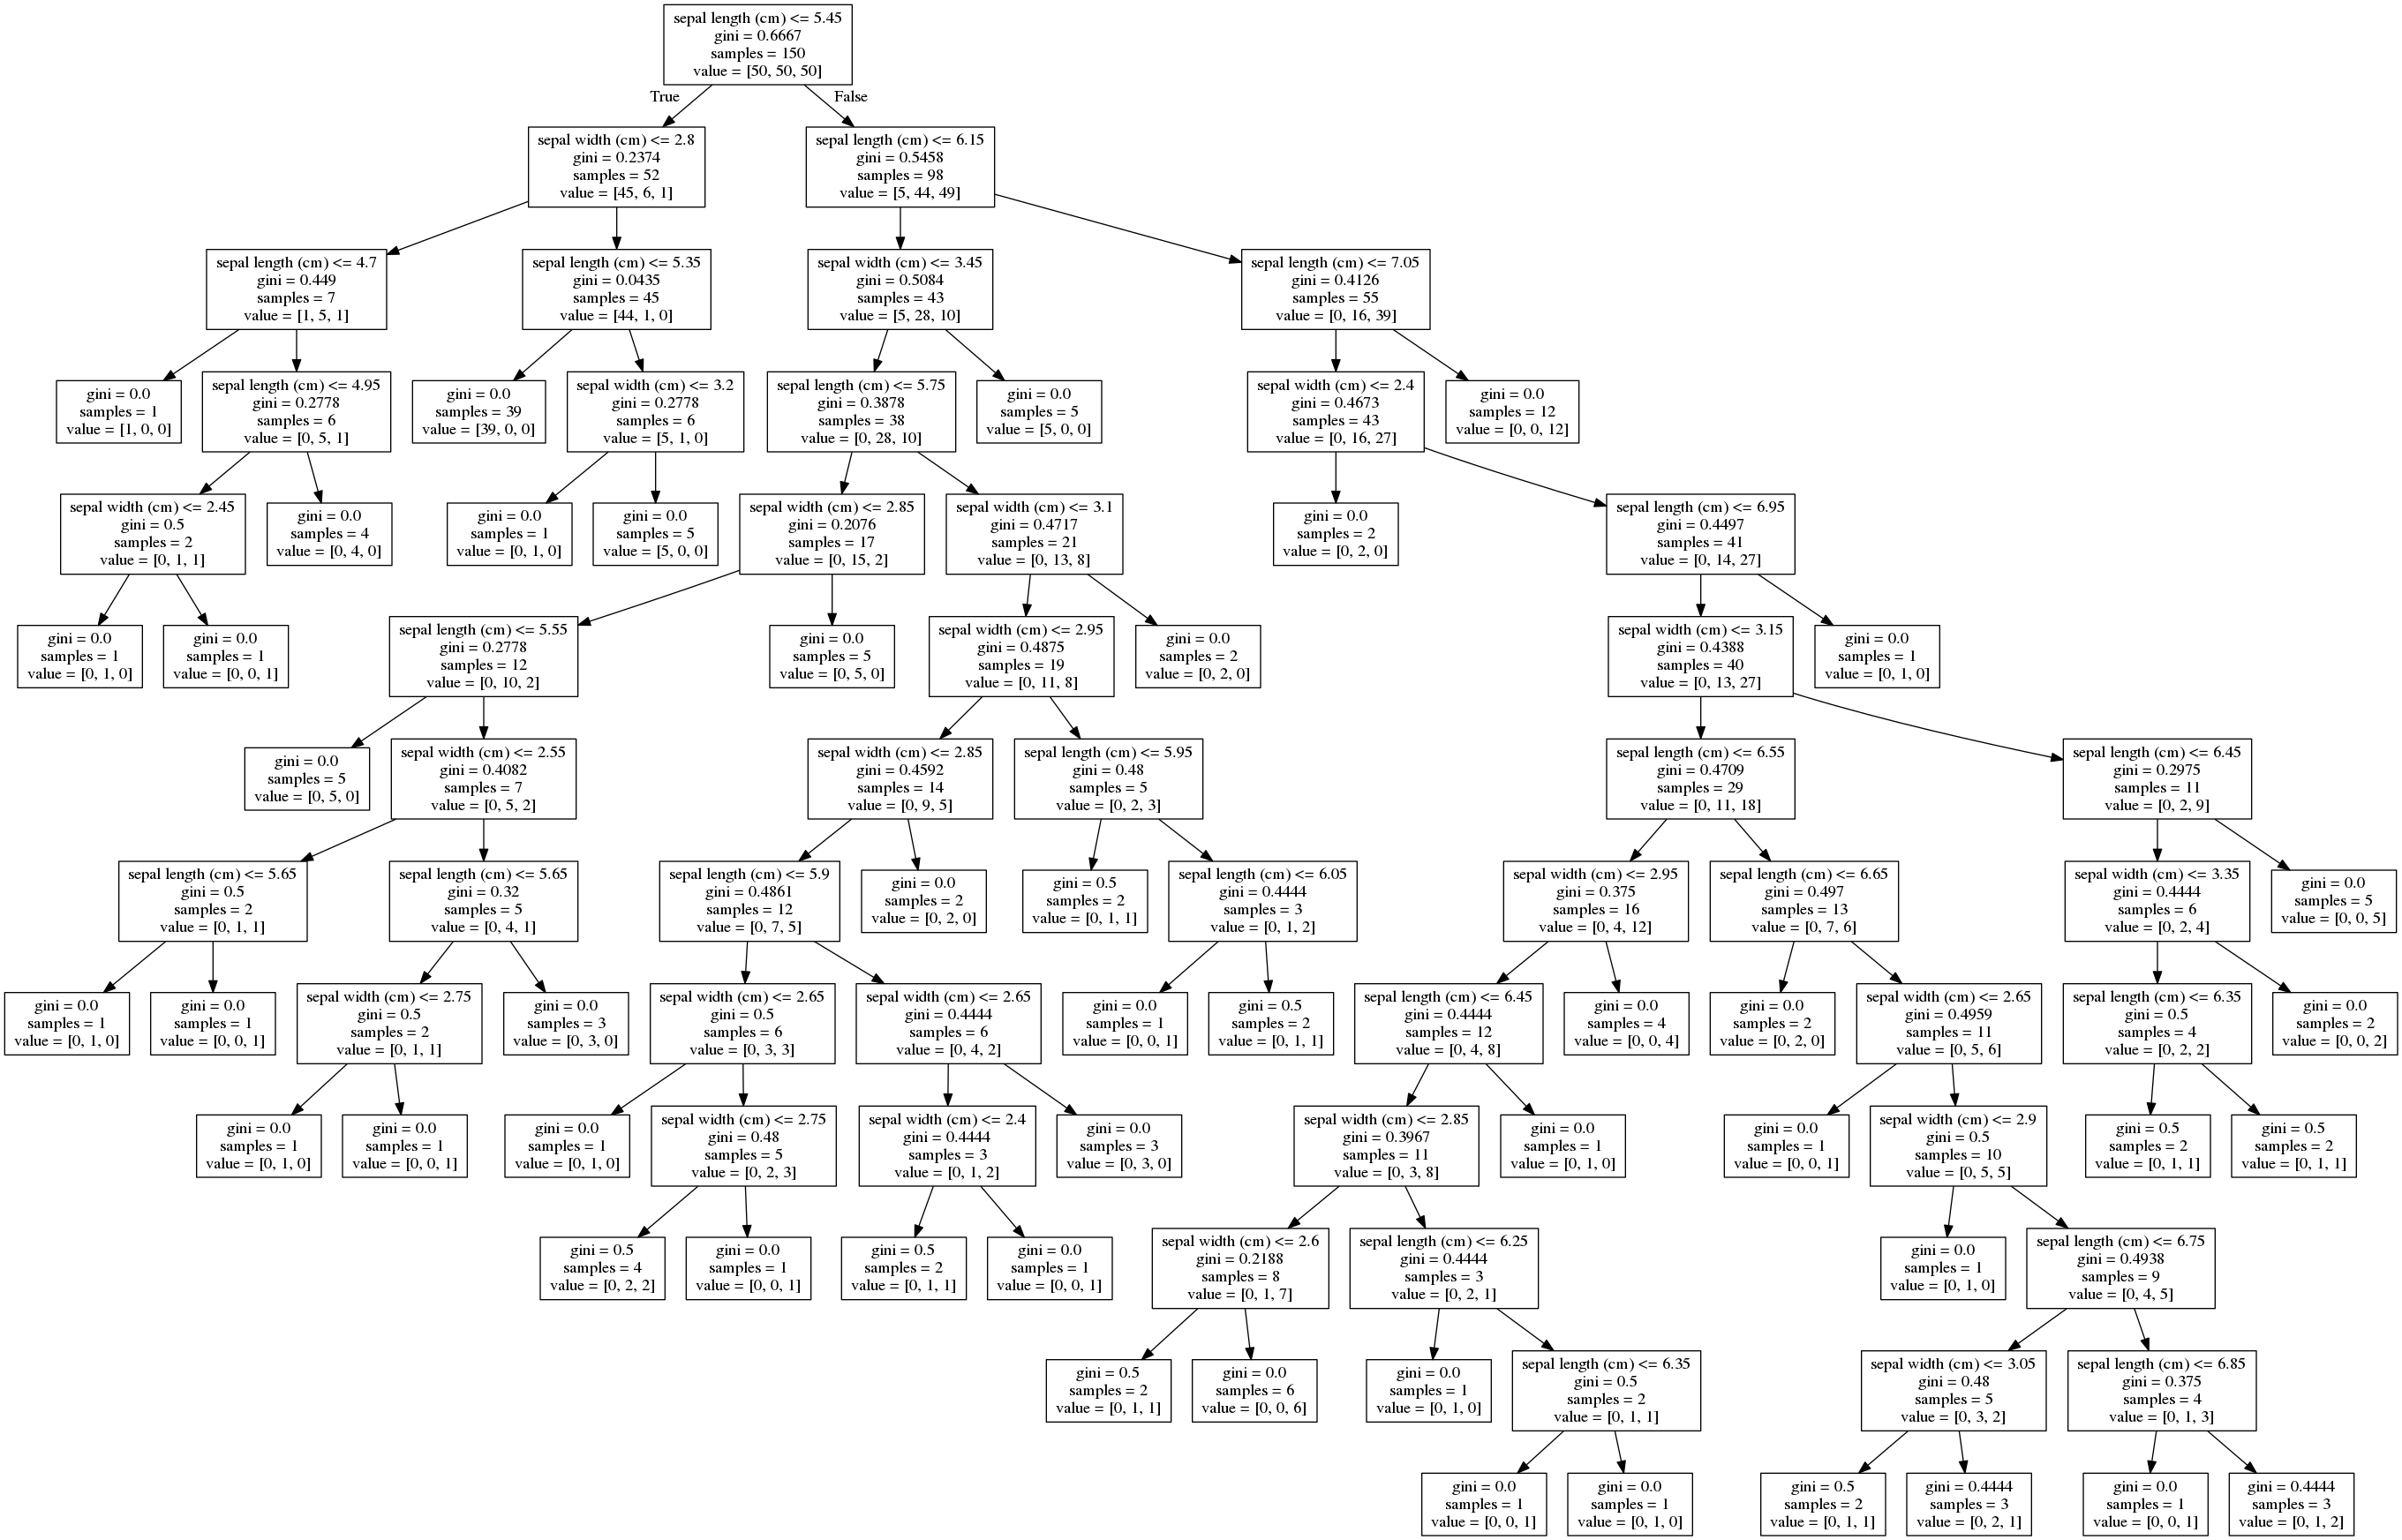

In [39]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris_dataset.feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris1.png') 
from IPython.core.display import Image 
Image(filename='iris1.png')